In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# # Step 1: Mount Google Drive to save the dataset files
# from google.colab import drive
# import os

# drive.mount('/content/drive')

# # Step 2: Change directory to your Google Drive folder where you want to save the files
# save_dir = '/content/drive/MyDrive/panoradio'  # Update this path if necessary
# os.makedirs(save_dir, exist_ok=True)
# os.chdir(save_dir)

# # Step 3: Download the dataset files using wget
# !wget http://www.panoradio-sdr.de/wp-content/uploads/dataset_panoradio_hf.zip.001
# !wget http://www.panoradio-sdr.de/wp-content/uploads/dataset_panoradio_hf.zip.002
# !wget http://www.panoradio-sdr.de/wp-content/uploads/dataset_panoradio_hf.zip.003
# !wget http://www.panoradio-sdr.de/wp-content/uploads/dataset_panoradio_hf_tags.csv
# !wget http://www.panoradio-sdr.de/wp-content/uploads/dataset_panoradio_hf_readme.txt

# # Step 4: Combine the split .zip files into one .zip file
# !cat dataset_panoradio_hf.zip.001 dataset_panoradio_hf.zip.002 dataset_panoradio_hf.zip.003 > dataset_panoradio_hf.zip

# # Step 5: Unzip the combined dataset zip file
# !unzip dataset_panoradio_hf.zip

# # Step 6: List the extracted files to confirm successful extraction
# !ls


In [ ]:
!cd /content/drive/MyDrive/panoradio/



In [ ]:
# Step 5: Unzip the combined dataset zip file
!unzip /content/drive/MyDrive/panoradio/dataset_panoradio_hf.zip

# Step 6: List the extracted files to confirm successful extraction
!ls

Archive:  /content/drive/MyDrive/panoradio/dataset_panoradio_hf.zip
  inflating: dataset_hf_radio.npy    
dataset_hf_radio.npy  drive  sample_data


In [ ]:
import numpy as np

# Load the numpy array
data = np.load('dataset_hf_radio.npy')

# Check the shape of the data
print(data.shape)

# For example, if you want to see the first signal vector
print(data[0])


(172800, 2048)
[-0.96831675-0.77203663j -0.85321414-0.87614335j -0.71319101-0.95659733j
 ... -0.99032657-0.67334504j -0.81983456-0.75864761j
 -0.77808431-0.86835014j]


# Load IQ Signal Data

In [ ]:
import numpy as np

# Assuming the data has already been loaded into a numpy array
data = np.load('dataset_hf_radio.npy')

# Store basic properties
num_vectors = data.shape[0]  # Number of signal vectors (172,800)
vector_length = data.shape[1]  # Number of samples per vector (2,048)
sampling_freq = 6000  # Sampling frequency (6 kHz)

# Store results for later analysis
basic_info = {
    'num_vectors': num_vectors,
    'vector_length': vector_length,
    'sampling_freq': sampling_freq,
}

print(basic_info)


{'num_vectors': 172800, 'vector_length': 2048, 'sampling_freq': 6000}


# Load Metadata

In [ ]:
import pandas as pd

# Load the metadata CSV
metadata = pd.read_csv('/content/drive/MyDrive/panoradio/dataset_panoradio_hf_tags.csv')

# Clean column names
metadata.columns = metadata.columns.str.strip()

# Check for missing values or inconsistencies
print(metadata.isnull().sum())  # Ensure no missing values
print(metadata.head())  # Preview the metadata

# Store metadata for analysis
metadata_info = metadata.copy()


idx     0
mode    0
snr     0
dtype: int64
   idx   mode  snr
0    0  morse   25
1    1  morse   25
2    2  morse   25
3    3  morse   25
4    4  morse   25


# Signal Vector Analysis


## `Plot Time-Domain Signal`

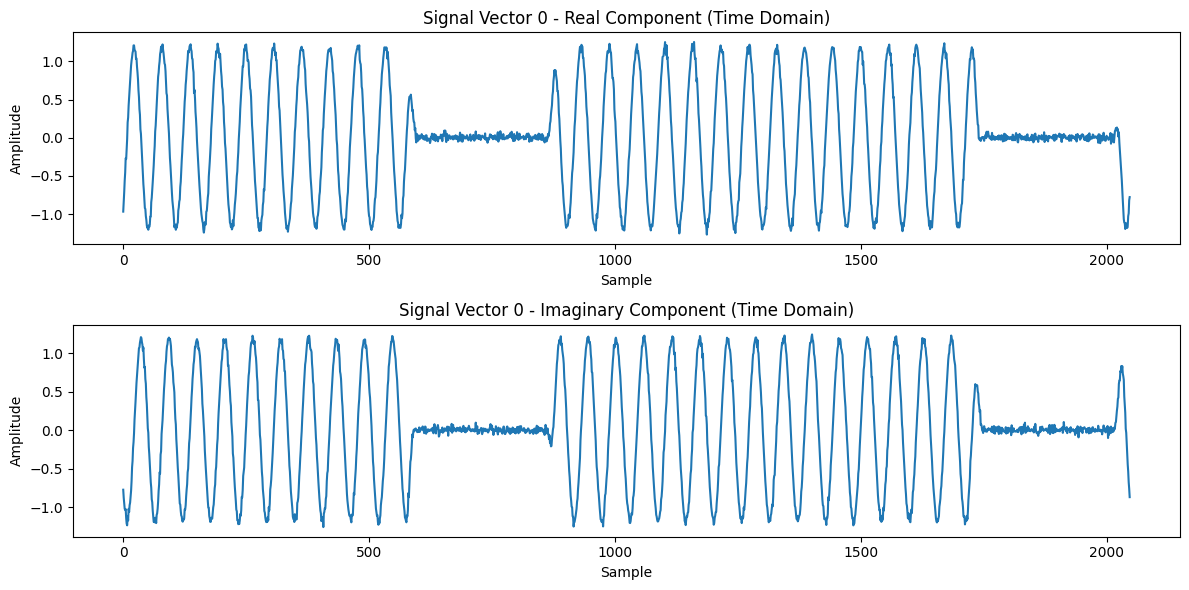

In [ ]:
import matplotlib.pyplot as plt

# Select a signal vector (index 0 for demonstration)
signal_index = 0
signal_vector = data[signal_index]

# Plot the real and imaginary components of the signal
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(signal_vector.real)
plt.title(f"Signal Vector {signal_index} - Real Component (Time Domain)")
plt.xlabel("Sample")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.plot(signal_vector.imag)
plt.title(f"Signal Vector {signal_index} - Imaginary Component (Time Domain)")
plt.xlabel("Sample")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()


##  Frequency-Domain Analysis (FFT)

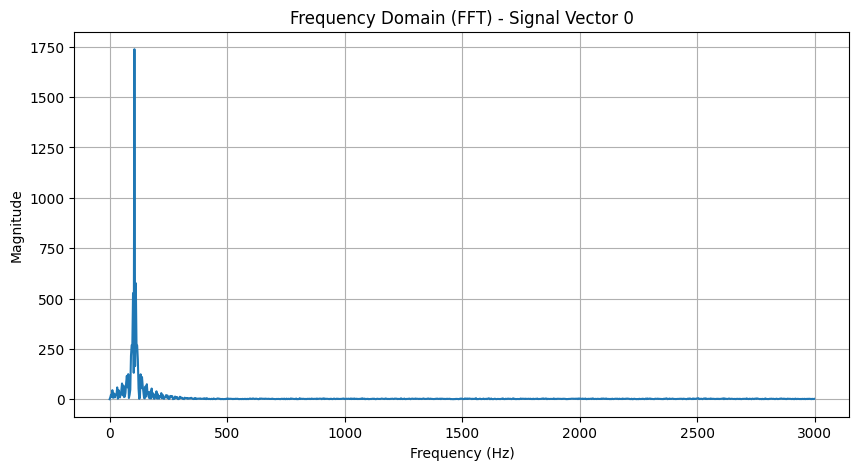

In [ ]:
# Compute the FFT of the signal vector
fft_signal = np.fft.fft(signal_vector)

# Compute the frequency bins
freqs = np.fft.fftfreq(len(signal_vector), 1/sampling_freq)

# Plot the magnitude of the FFT (frequency domain)
plt.figure(figsize=(10, 5))
plt.plot(freqs[:len(freqs)//2], np.abs(fft_signal)[:len(freqs)//2])
plt.title(f"Frequency Domain (FFT) - Signal Vector {signal_index}")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

# Store FFT result for further analysis
fft_results = {
    'signal_index': signal_index,
    'fft_signal': fft_signal,
    'freqs': freqs,
}


# SNR and Signal Power Analysis

## Access and Store SNR Values

In [ ]:
# Get the SNR value for the selected signal vector
snr_value = metadata.loc[metadata['idx'] == signal_index, 'snr'].values[0]

# Store SNR for the signal vector
snr_info = {
    'signal_index': signal_index,
    'snr': snr_value,
}

print(f"SNR for signal vector {signal_index}: {snr_value} dB")


SNR for signal vector 0: 25 dB


## Calculate Signal Power

In [ ]:
# Calculate signal power (mean of squared magnitudes)
signal_power = np.mean(np.abs(signal_vector)**2)

# Store signal power for analysis
signal_power_info = {
    'signal_index': signal_index,
    'signal_power': signal_power,
}

print(f"Signal Power for signal vector {signal_index}: {signal_power}")


Signal Power for signal vector 0: 1.0


## Phase and Frequency Offset Analysis

Phase Spectrum

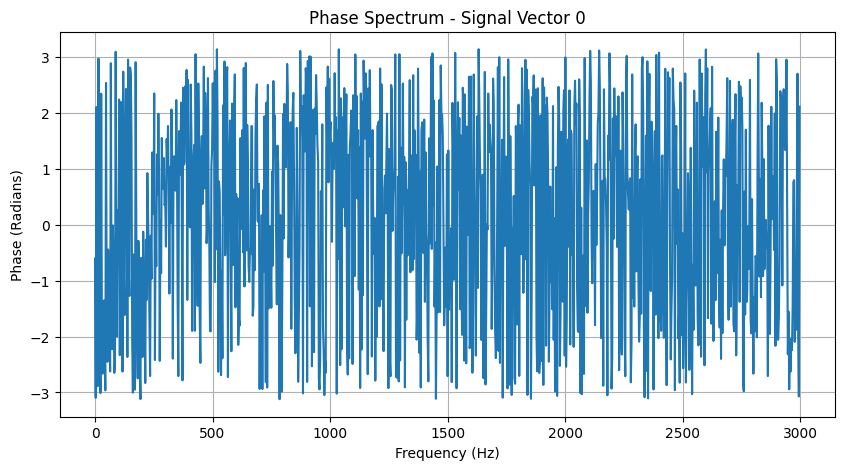

In [ ]:
# Plot the phase spectrum of the FFT
plt.figure(figsize=(10, 5))
plt.plot(freqs[:len(freqs)//2], np.angle(fft_signal)[:len(freqs)//2])
plt.title(f"Phase Spectrum - Signal Vector {signal_index}")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (Radians)")
plt.grid()
plt.show()

# Store phase spectrum for analysis
phase_info = {
    'signal_index': signal_index,
    'phase': np.angle(fft_signal),
}


# `Denoising and Filtering`

## Apply Low-Pass Filter

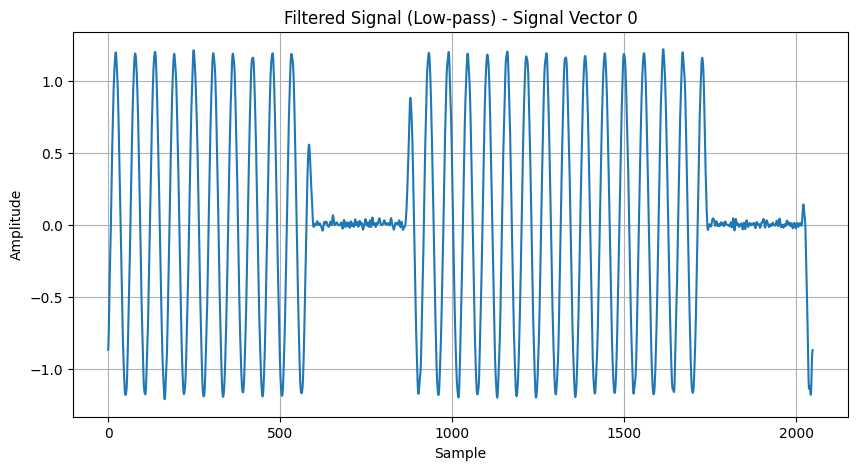

In [ ]:
def apply_lowpass_filter(signal, cutoff_freq, fs):
    # FFT of the signal
    fft_signal = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(signal), 1/fs)

    # Zero out frequencies above the cutoff
    fft_signal[np.abs(freqs) > cutoff_freq] = 0

    # Inverse FFT to return to time domain
    filtered_signal = np.fft.ifft(fft_signal)
    return filtered_signal

# Apply low-pass filter
cutoff_frequency = 1000  # 1 kHz
filtered_signal = apply_lowpass_filter(signal_vector, cutoff_frequency, sampling_freq)

# Plot the filtered signal (time domain)
plt.figure(figsize=(10, 5))
plt.plot(filtered_signal.real)
plt.title(f"Filtered Signal (Low-pass) - Signal Vector {signal_index}")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

# Store filtered signal for analysis
filtered_signal_info = {
    'signal_index': signal_index,
    'filtered_signal': filtered_signal,
}


In [ ]:
# Store all results in a dictionary for further analysis
analysis_results = {
    'basic_info': basic_info,
    'metadata_info': metadata_info,
    'fft_results': fft_results,
    'snr_info': snr_info,
    'signal_power_info': signal_power_info,
    'phase_info': phase_info,
    'filtered_signal_info': filtered_signal_info,
}
print(analysis_results)


{'basic_info': {'num_vectors': 172800, 'vector_length': 2048, 'sampling_freq': 6000}, 'metadata_info':            idx   mode  snr
0            0  morse   25
1            1  morse   25
2            2  morse   25
3            3  morse   25
4            4  morse   25
...        ...    ...  ...
172795  172795    fax  -10
172796  172796    fax  -10
172797  172797    fax  -10
172798  172798    fax  -10
172799  172799    fax  -10

[172800 rows x 3 columns], 'fft_results': {'signal_index': 0, 'fft_signal': array([ 3.58602037e-14-2.48689958e-14j, -9.38508135e+00-4.29080249e-01j,
       -1.14460164e+01+1.94844226e+01j, ...,
       -3.31766507e+01+4.26607948e-01j, -7.79911108e+00+4.39253910e+00j,
       -4.99039408e+00-1.88492364e+01j]), 'freqs': array([ 0.       ,  2.9296875,  5.859375 , ..., -8.7890625, -5.859375 ,
       -2.9296875])}, 'snr_info': {'signal_index': 0, 'snr': 25}, 'signal_power_info': {'signal_index': 0, 'signal_power': 1.0}, 'phase_info': {'signal_index': 0, 'phase': array([-0.

In [ ]:
# Define a list to store results for multiple signals
all_signal_results = []

# Loop through a range of signal indices (e.g., first 10 or a random sample)
for signal_index in range(10):  # You can adjust the range or randomly select indices
    signal_vector = data[signal_index]

    # Perform the same analysis as before for each signal
    # FFT
    fft_signal = np.fft.fft(signal_vector)
    freqs = np.fft.fftfreq(len(signal_vector), 1/sampling_freq)

    # SNR from metadata
    snr_value = metadata.loc[metadata['idx'] == signal_index, 'snr'].values[0]

    # Signal Power
    signal_power = np.mean(np.abs(signal_vector)**2)

    # Store all results for this signal
    signal_results = {
        'signal_index': signal_index,
        'snr': snr_value,
        'signal_power': signal_power,
        'fft_signal': fft_signal,
        'freqs': freqs,
    }

    # Append to list
    all_signal_results.append(signal_results)

# Now you can analyze the results across multiple signals
print(all_signal_results)


[{'signal_index': 0, 'snr': 25, 'signal_power': 1.0, 'fft_signal': array([ 3.58602037e-14-2.48689958e-14j, -9.38508135e+00-4.29080249e-01j,
       -1.14460164e+01+1.94844226e+01j, ...,
       -3.31766507e+01+4.26607948e-01j, -7.79911108e+00+4.39253910e+00j,
       -4.99039408e+00-1.88492364e+01j]), 'freqs': array([ 0.       ,  2.9296875,  5.859375 , ..., -8.7890625, -5.859375 ,
       -2.9296875])}, {'signal_index': 1, 'snr': 25, 'signal_power': 0.9999999999999999, 'fft_signal': array([ 1.55431223e-15-1.11022302e-16j, -1.33484808e+01+2.02176361e-01j,
       -8.23708430e+00+7.93580943e-01j, ...,
        5.67599349e+00-1.42948495e+01j, -1.26220304e+01-3.20497727e+01j,
       -1.34325418e+01+8.44430452e+00j]), 'freqs': array([ 0.       ,  2.9296875,  5.859375 , ..., -8.7890625, -5.859375 ,
       -2.9296875])}, {'signal_index': 2, 'snr': 25, 'signal_power': 1.0, 'fft_signal': array([ 9.21485110e-15+2.84217094e-14j,  1.97162956e+00-4.08844065e+00j,
        3.65389771e+00-5.20734376e+00j, .

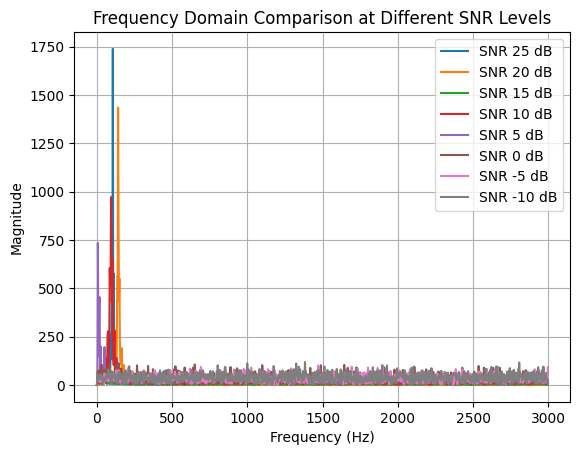

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Group signals by SNR values
for snr_value in metadata['snr'].unique():
    signals_at_snr = metadata[metadata['snr'] == snr_value]['idx'].values
    signal_vector = data[signals_at_snr[0]]  # Use the first signal for this SNR

    # FFT
    fft_signal = np.fft.fft(signal_vector)
    freqs = np.fft.fftfreq(len(signal_vector), 1/sampling_freq)

    # Plot FFT magnitude for each SNR level
    plt.plot(freqs[:len(freqs)//2], np.abs(fft_signal)[:len(freqs)//2], label=f'SNR {snr_value} dB')

# Show the comparison
plt.title("Frequency Domain Comparison at Different SNR Levels")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Create subplots for each modulation type
num_modulations = len(modulation_types)
plt.figure(figsize=(10, 3 * num_modulations))  # Adjust figure size based on the number of modulations

for i, modulation in enumerate(modulation_types):
    signal_index = metadata[metadata['mode'] == modulation]['idx'].values[0]
    signal_vector = data[signal_index]

    # Create a subplot for each modulation type
    plt.subplot(num_modulations, 1, i + 1)  # Create num_modulations rows, 1 column, current index
    plt.plot(signal_vector.real, label=f'{modulation} - Signal {signal_index}')
    plt.title(f"Time Domain Signal for {modulation}")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)

plt.tight_layout()  # Adjust spacing to avoid overlap
plt.show()


NameError: name 'modulation_types' is not defined

In [ ]:
# Apply low-pass filter based on SNR
def apply_filter_based_on_snr(signal, snr):
    if snr <= 0:
        cutoff = 500  # Very low cutoff for aggressive filtering
    elif snr <= 10:
        cutoff = 1000
    else:
        cutoff = 2000  # Less aggressive filtering for high SNR

    filtered_signal = apply_lowpass_filter(signal, cutoff, sampling_freq)
    return filtered_signal

# Example: Filter a low SNR signal
signal_index = metadata[metadata['snr'] == -10]['idx'].values[0]
signal_vector = data[signal_index]

filtered_signal = apply_filter_based_on_snr(signal_vector, -10)

# Plot original vs filtered
plt.figure(figsize=(10, 5))
plt.plot(signal_vector.real, label="Original Signal")
plt.plot(filtered_signal.real, label="Filtered Signal")
plt.title("Low SNR Signal: Original vs Filtered")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Extract features for training (e.g., FFT magnitudes, SNR, signal power)
features = []
labels = []

for signal_index in range(len(data)):
    signal_vector = data[signal_index]

    # FFT magnitude as a feature
    fft_signal = np.fft.fft(signal_vector)
    fft_magnitude = np.abs(fft_signal)[:len(fft_signal)//2]  # Only positive frequencies

    # SNR value
    snr_value = metadata.loc[metadata['idx'] == signal_index, 'snr'].values[0]

    # Signal power
    signal_power = np.mean(np.abs(signal_vector)**2)

    # Modulation label
    modulation_label = metadata.loc[metadata['idx'] == signal_index, 'mode'].values[0]

    # Append features and label
    features.append(np.concatenate(([snr_value, signal_power], fft_magnitude)))
    labels.append(modulation_label)

# You can now use `features` and `labels` to train a classification model


In [ ]:
!pwd
%cd /content/drive/MyDrive/panoradio
!pwd

/content
/content/drive/MyDrive/panoradio
/content/drive/MyDrive/panoradio


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import librosa
import librosa.display

# Directory to save the spectrogram images
save_dir = "spectrogram_images"
os.makedirs(save_dir, exist_ok=True)

# Loop through the signals and generate spectrogram images
for signal_index in range(len(data)):
    signal_vector = data[signal_index]

    # Generate a spectrogram (using short-time Fourier transform)
    fig, ax = plt.subplots()
    S = librosa.feature.melspectrogram(y=signal_vector.real, sr=6000, n_fft=2048, hop_length=512, n_mels=128)
    S_dB = librosa.power_to_db(S, ref=np.max)

    # Plot the spectrogram and capture the mappable
    img = librosa.display.specshow(S_dB, sr=6000, hop_length=512, x_axis='time', y_axis='mel', ax=ax)

    # Add the colorbar with the mappable object (img)
    plt.colorbar(img, format='%+2.0f dB')
    plt.title(f"Spectrogram - Signal {signal_index}")

    # Save the image
    img_file = os.path.join(save_dir, f"signal_{signal_index}.png")
    plt.savefig(img_file)
    plt.close()  # Close the figure to avoid display

print(f"Spectrograms saved in {save_dir}")
